In [95]:
import warnings
warnings.filterwarnings('ignore')
from operator import itemgetter
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import seaborn as sns #visualization
import json #exporting columns
import pickle #saving the model
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.linear_model import Lasso #Lasso Regression
from sklearn.tree import DecisionTreeRegressor #Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest Regression
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score #Score cross validation
from sklearn.model_selection import GridSearchCV #Hyper parameter tuning
from warnings import simplefilter #Filtering warnings
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
from datetime import datetime
from scipy import stats

<font face = "Time New Roman" size = 6>Observe the data</font>

<font face = "Time New Roman" size = 5> Import the data set and show the title </font>

In [96]:
Orginal_data = pd.read_csv('./Combined.csv',encoding = "ISO-8859-1")
Causes_data = pd.read_csv('./Causes.csv',encoding = "ISO-8859-1")

In [97]:
Orginal_data.columns

Index(['Campaign_ID', 'Campagin_Title ', 'Receiving_NPO_name ',
       'Receiving_NPO_Id', 'NPO_Status_orignal', 'NPO_Status',
       'Number_campaigns_NPO', 'Public_Campaign_Access', 'Creator_Type',
       'Creator_Id', 'Campaign_Status', 'Actual_Donation_Amount',
       'Distinct_Donors', 'Campaign_Goal', 'Campaign_Completion_Rate',
       'Days_Left_for_Campaign', 'Campaign_Start_Date', 'Campaign_End_Date',
       'NPO_Tax_Deductibility', 'Campaign_Image1', 'Campaign_Image2',
       'Campaign_Image3', 'Campaign_Image4', 'Campaign_Image5',
       'Campaign_Video', 'Impact_Message1', 'Impact_Message2',
       'Impact_Message3', 'Impact_Message4', 'Impact_Message5',
       'Custom_Amount1', 'Custom_Amount2', 'Custom_Amount3', 'Custom_Amount4',
       'Description_Campaign', 'Description_NPO'],
      dtype='object')

<AxesSubplot:>

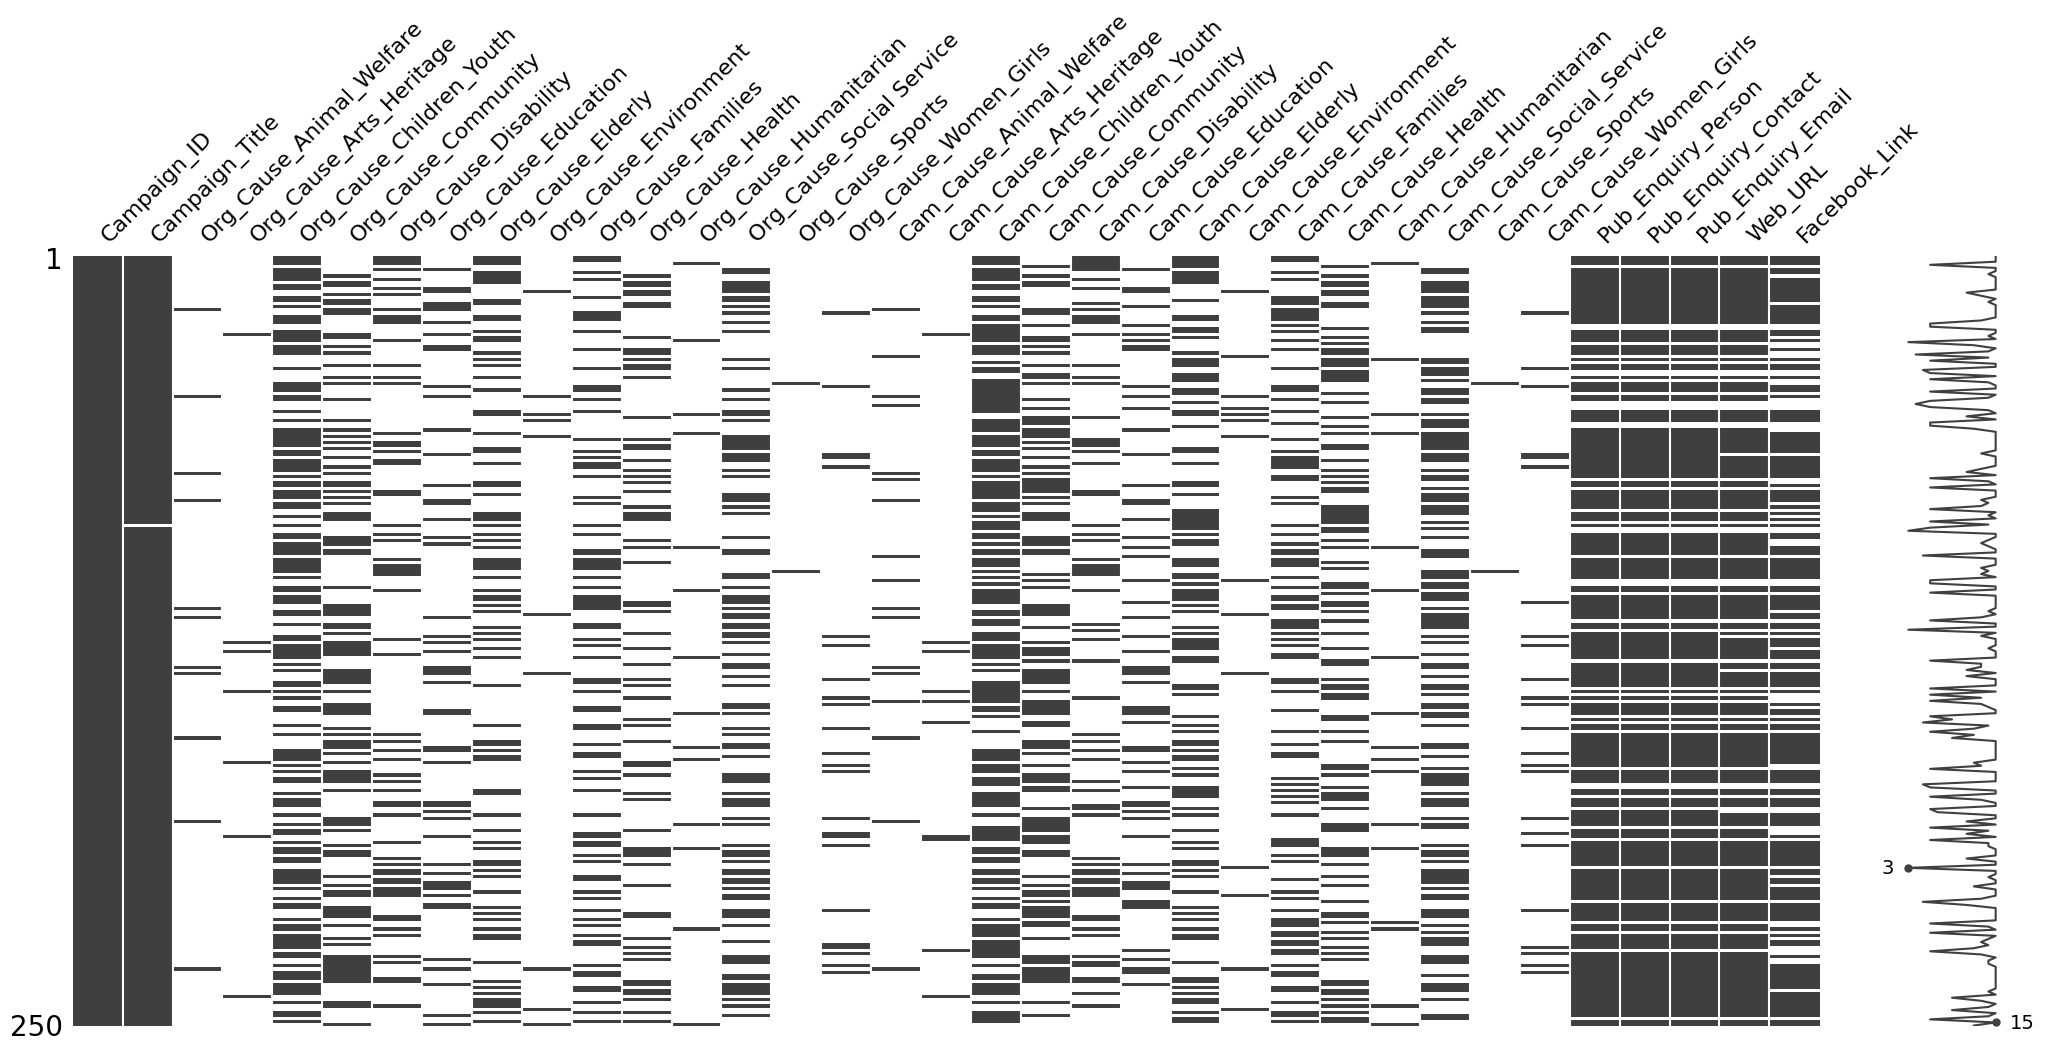

In [98]:
msno.matrix(Causes_data.sample(250))

In [99]:
Causes_data= Causes_data.fillna(0)

<AxesSubplot:>

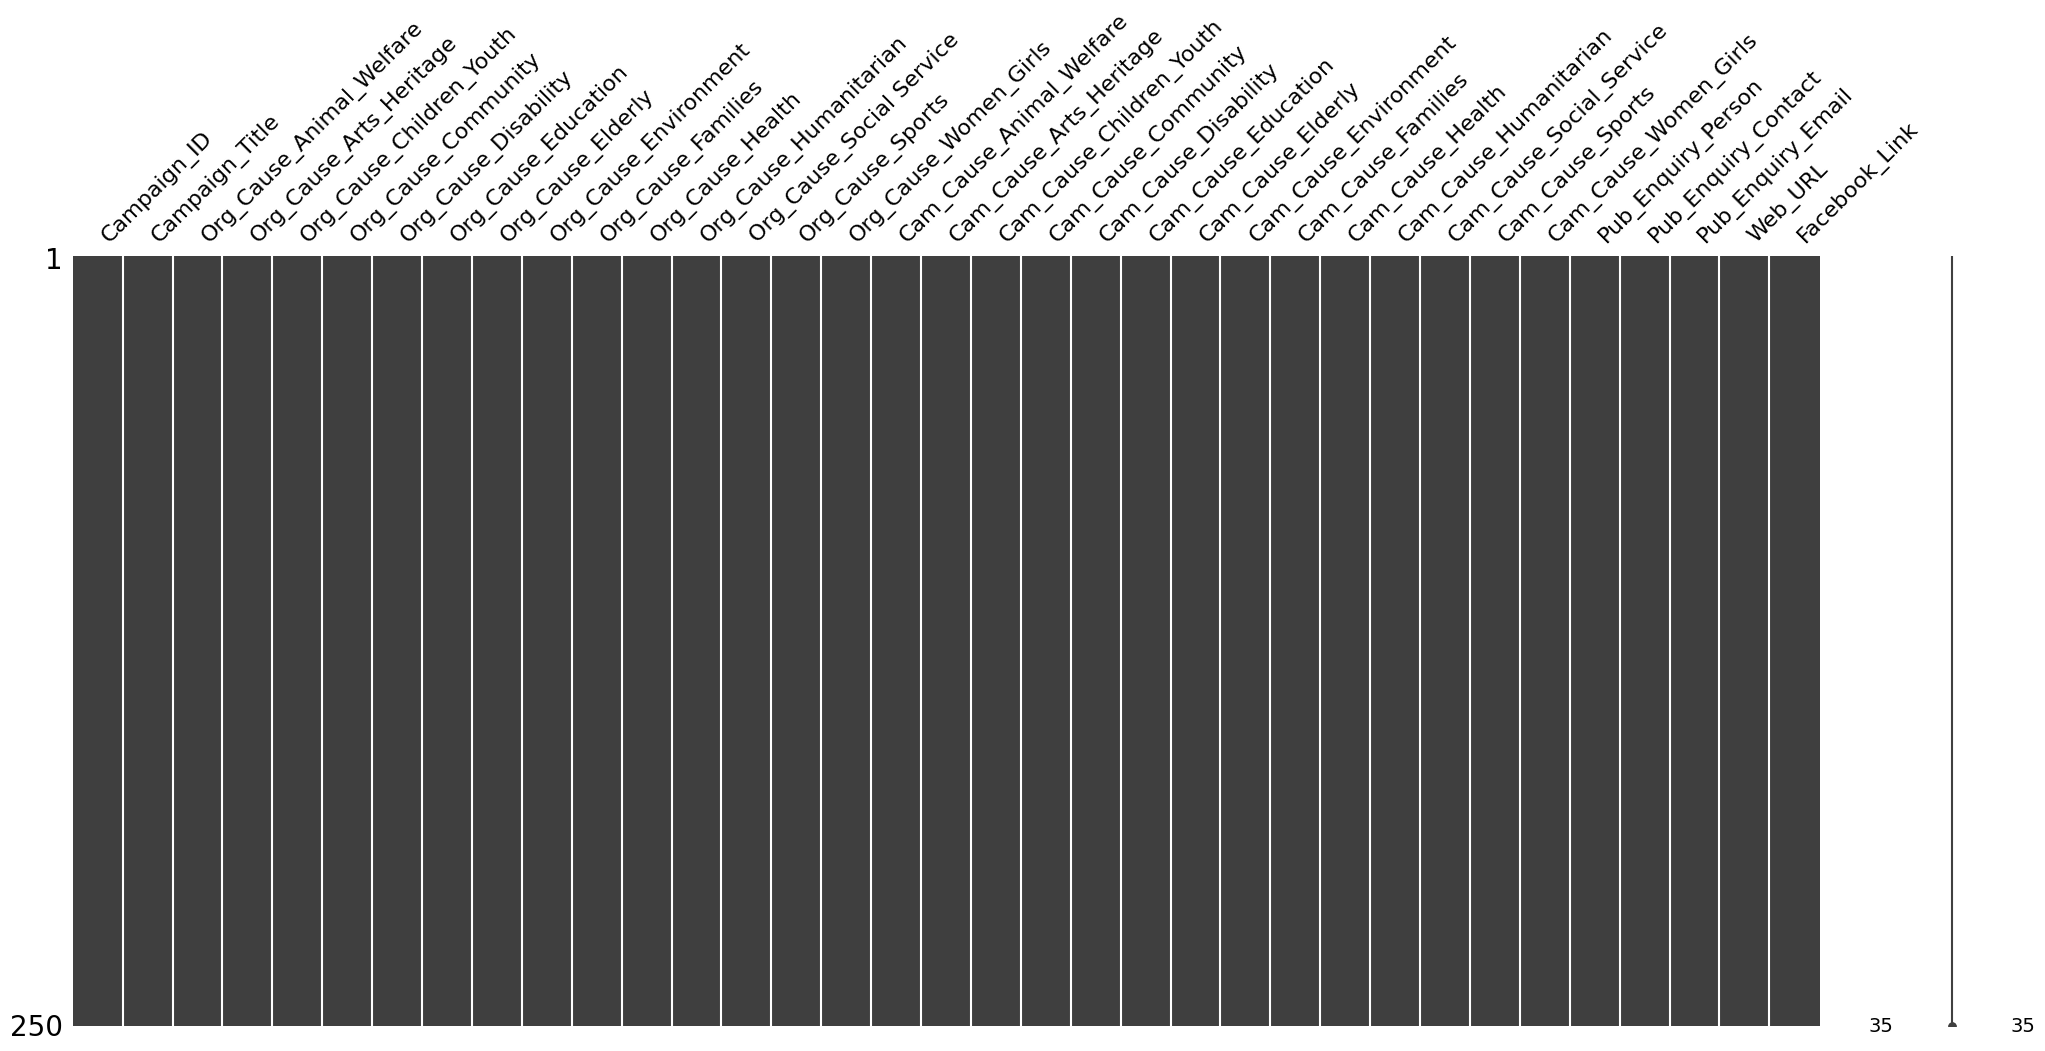

In [100]:
msno.matrix(Causes_data.sample(250))

In [101]:
combined_data = pd.merge(Orginal_data, Causes_data, how='left', on=['Campaign_ID'])

In [102]:
Total_Rows = combined_data.shape[0]
print(Total_Rows)

15979


In [103]:
print(combined_data.columns)

Index(['Campaign_ID', 'Campagin_Title ', 'Receiving_NPO_name ',
       'Receiving_NPO_Id', 'NPO_Status_orignal', 'NPO_Status',
       'Number_campaigns_NPO', 'Public_Campaign_Access', 'Creator_Type',
       'Creator_Id', 'Campaign_Status', 'Actual_Donation_Amount',
       'Distinct_Donors', 'Campaign_Goal', 'Campaign_Completion_Rate',
       'Days_Left_for_Campaign', 'Campaign_Start_Date', 'Campaign_End_Date',
       'NPO_Tax_Deductibility', 'Campaign_Image1', 'Campaign_Image2',
       'Campaign_Image3', 'Campaign_Image4', 'Campaign_Image5',
       'Campaign_Video', 'Impact_Message1', 'Impact_Message2',
       'Impact_Message3', 'Impact_Message4', 'Impact_Message5',
       'Custom_Amount1', 'Custom_Amount2', 'Custom_Amount3', 'Custom_Amount4',
       'Description_Campaign', 'Description_NPO', 'Campaign_Title',
       'Org_Cause_Animal_Welfare', 'Org_Cause_Arts_Heritage',
       'Org_Cause_Children_Youth', 'Org_Cause_Community',
       'Org_Cause_Disability', 'Org_Cause_Education', 'Org

<font face = "Time New Roman" size = 5> I found there is no "Organizational Causes" and "Campaign Causes" in this data set.<br>
Here are all variables I plan to operate, ignnore other columns temporarily
</font>

In [104]:
Need_variable = ["Actual_Donation_Amount","NPO_Tax_Deductibility", "Distinct_Donors",
"Campaign_Goal","Campaign_Start_Date", "Campaign_End_Date", 
"Campaign_Image1", "Campaign_Image2","Campaign_Image3",
"Campaign_Image4","Campaign_Image5","Campaign_Video",
"Impact_Message1","Impact_Message2","Impact_Message3","Impact_Message4",
"Impact_Message5","Custom_Amount1","Custom_Amount2","Custom_Amount3",
"Custom_Amount4","Description_Campaign","Description_NPO",
'Org_Cause_Animal_Welfare', 'Org_Cause_Arts_Heritage',
'Org_Cause_Children_Youth', 'Org_Cause_Community',
'Org_Cause_Disability', 'Org_Cause_Education', 'Org_Cause_Elderly',
'Org_Cause_Environment', 'Org_Cause_Families', 'Org_Cause_Health',
'Org_Cause_Humanitarian', 'Org_Cause_Social Service',
'Org_Cause_Sports', 'Org_Cause_Women_Girls', 'Cam_Cause_Animal_Welfare',
'Cam_Cause_Arts_Heritage', 'Cam_Cause_Children_Youth',
'Cam_Cause_Community', 'Cam_Cause_Disability', 'Cam_Cause_Education',
'Cam_Cause_Elderly', 'Cam_Cause_Environment', 'Cam_Cause_Families',
'Cam_Cause_Health', 'Cam_Cause_Humanitarian',
'Cam_Cause_Social_Service', 'Cam_Cause_Sports', 'Cam_Cause_Women_Girls'
]
extract_data = combined_data[Need_variable]
extract_data

,Actual_Donation_Amount,NPO_Tax_Deductibility,Distinct_Donors,Campaign_Goal,Campaign_Start_Date,Campaign_End_Date,Campaign_Image1,Campaign_Image2,Campaign_Image3,Campaign_Image4,...,Cam_Cause_Disability,Cam_Cause_Education,Cam_Cause_Elderly,Cam_Cause_Environment,Cam_Cause_Families,Cam_Cause_Health,Cam_Cause_Humanitarian,Cam_Cause_Social_Service,Cam_Cause_Sports,Cam_Cause_Women_Girls
0,5561.0,True,66,50000,1-Jan-17,10-Sep-17,4608036,4608055,4749035,4749043,...,0,0,0,0,0,0,0,Social Service,0,0
1,2810.0,True,32,20000,1-Jan-17,31-Mar-17,4648562,4648570,0,0,...,Disability,0,0,0,0,0,0,0,0,0
2,1118.0,True,22,30000,1-Jan-17,28-Feb-17,4662653,4662666,0,0,...,Disability,0,0,0,0,0,0,0,0,0
3,2800.0,True,7,2000,2-Jan-17,31-Mar-17,4529083,4529099,4529209,4741001,...,0,0,Elderly,Environment,0,0,Humanitarian,Social Service,0,0
4,2030.0,True,27,5000,1-Jan-17,20-Feb-17,3417798,3417790,3417782,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15974,10.0,True,1,5000,31-Oct-22,1-Jan-23,81619865,81619875,81619884,81619892,...,0,Education,0,0,Families,0,0,0,0,0
15975,150.0,True,4,10000,31-Oct-22,30-Nov-22,81633173,81633175,81633177,0,...,0,0,0,0,0,Health,0,0,0,0
15976,1000.0,True,10,1000,31-Oct-22,30-Nov-22,81633197,81633199,81633301,0,...,0,0,0,0,0,Health,0,0,0,0
15977,120.0,True,2,3000,31-Oct-22,31-Dec-22,81635545,81635580,0,0,...,0,0,0,0,0,0,0,Social Service,0,Women & Girls


<AxesSubplot:>

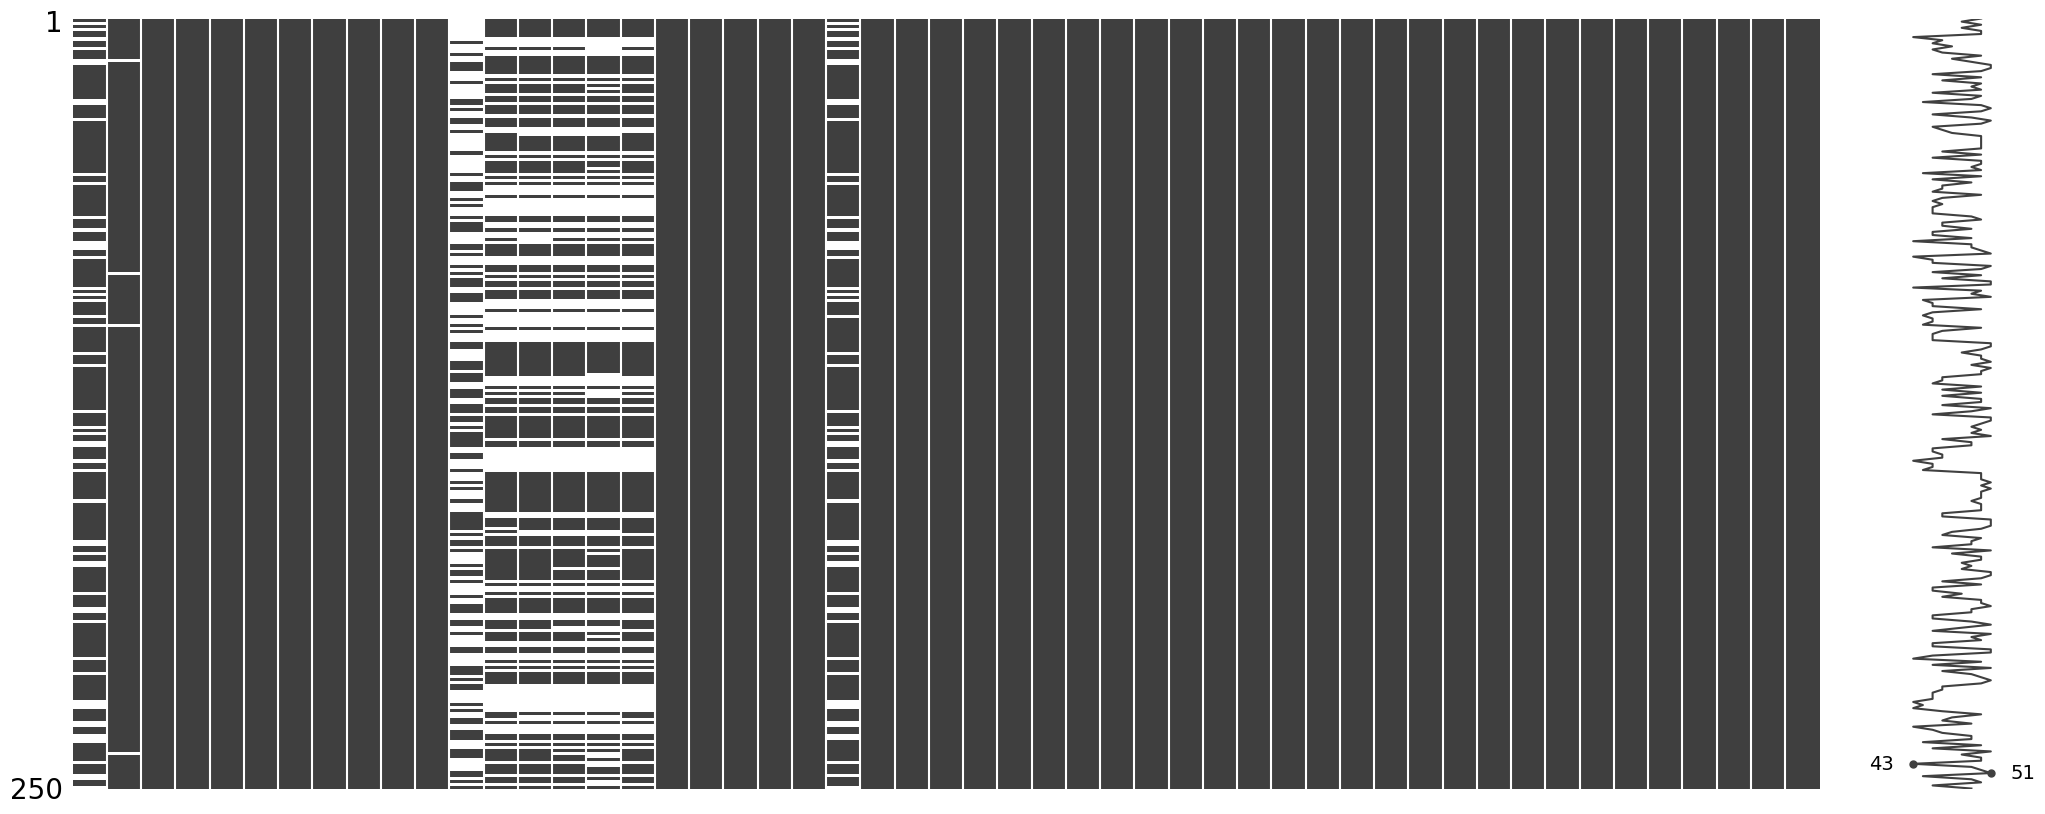

In [105]:
msno.matrix(extract_data.sample(250))


<font face = "Time New Roman" size = 5> We can see that "Actual_Donation_Amount" "Campaign_Video" "Impact_Message1" "Impact_Message2" "Impact_Message3" "Impact_Message4" and "Impact_Message5" are many missing data, fill them first so that it's more convenient to operate. "NPO_Tax_Deductibility" has been ignore temporarily just like you said in email</font>

In [106]:
extract_data['NPO_Tax_Deductibility'] = extract_data['NPO_Tax_Deductibility'].fillna('0')
extract_data['Actual_Donation_Amount'] = extract_data['Actual_Donation_Amount'].fillna('0')
extract_data['Actual_Donation_Amount'] = pd.to_numeric( extract_data['Actual_Donation_Amount'])
extract_data['Distinct_Donors'] = extract_data['Distinct_Donors'].fillna('0')
extract_data['Distinct_Donors'] = pd.to_numeric( extract_data['Distinct_Donors'])
extract_data['Campaign_Video'] = extract_data['Campaign_Video'].fillna('0')
extract_data['Impact_Message1'] = extract_data['Impact_Message1'].fillna('0')
extract_data['Impact_Message2'] = extract_data['Impact_Message2'].fillna('0')
extract_data['Impact_Message3'] = extract_data['Impact_Message3'].fillna('0')
extract_data['Impact_Message4'] = extract_data['Impact_Message4'].fillna('0')
extract_data['Impact_Message5'] = extract_data['Impact_Message5'].fillna('0')

In [107]:
extract_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15979 entries, 0 to 15978
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Actual_Donation_Amount    15979 non-null  float64
 1   NPO_Tax_Deductibility     15979 non-null  object 
 2   Distinct_Donors           15979 non-null  int64  
 3   Campaign_Goal             15979 non-null  int64  
 4   Campaign_Start_Date       15979 non-null  object 
 5   Campaign_End_Date         15979 non-null  object 
 6   Campaign_Image1           15979 non-null  int64  
 7   Campaign_Image2           15979 non-null  int64  
 8   Campaign_Image3           15979 non-null  int64  
 9   Campaign_Image4           15979 non-null  int64  
 10  Campaign_Image5           15979 non-null  int64  
 11  Campaign_Video            15979 non-null  object 
 12  Impact_Message1           15979 non-null  object 
 13  Impact_Message2           15979 non-null  object 
 14  Impact

<font face = "Time New Roman" size = 5>There is no donations per donor, So add a columns of donations per donor</font>

In [108]:
extract_data.columns

Index(['Actual_Donation_Amount', 'NPO_Tax_Deductibility', 'Distinct_Donors',
       'Campaign_Goal', 'Campaign_Start_Date', 'Campaign_End_Date',
       'Campaign_Image1', 'Campaign_Image2', 'Campaign_Image3',
       'Campaign_Image4', 'Campaign_Image5', 'Campaign_Video',
       'Impact_Message1', 'Impact_Message2', 'Impact_Message3',
       'Impact_Message4', 'Impact_Message5', 'Custom_Amount1',
       'Custom_Amount2', 'Custom_Amount3', 'Custom_Amount4',
       'Description_Campaign', 'Description_NPO', 'Org_Cause_Animal_Welfare',
       'Org_Cause_Arts_Heritage', 'Org_Cause_Children_Youth',
       'Org_Cause_Community', 'Org_Cause_Disability', 'Org_Cause_Education',
       'Org_Cause_Elderly', 'Org_Cause_Environment', 'Org_Cause_Families',
       'Org_Cause_Health', 'Org_Cause_Humanitarian',
       'Org_Cause_Social Service', 'Org_Cause_Sports', 'Org_Cause_Women_Girls',
       'Cam_Cause_Animal_Welfare', 'Cam_Cause_Arts_Heritage',
       'Cam_Cause_Children_Youth', 'Cam_Cause_Communi

In [109]:
extract_data['NPO_Tax_Deductibility'][0:20]

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7     False
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
Name: NPO_Tax_Deductibility, dtype: object

In [138]:
# I am not sure Distinct_Donors is the total donors or not ?
extract_data['Donation_per_donor'] = 0
for j in range(len(extract_data["Actual_Donation_Amount"])):
    if extract_data["Distinct_Donors"].iloc[j] != 0:
        extract_data['Donation_per_donor'].iloc[j] = extract_data['Actual_Donation_Amount'].iloc[j]/extract_data['Distinct_Donors'].iloc[j]
    else:
        extract_data['Donation_per_donor'].iloc[j] = 0

    if extract_data['NPO_Tax_Deductibility'].iloc[j] == True:
        extract_data.loc[j, 'NPO_Tax_Deductibility'] = 1
    else:
        extract_data.loc[j, 'NPO_Tax_Deductibility'] = 0

## Sum the numbers of org_causes and camp_causes

In [111]:
Org_causes = ['Org_Cause_Animal_Welfare', 'Org_Cause_Arts_Heritage',
       'Org_Cause_Children_Youth', 'Org_Cause_Community',
       'Org_Cause_Disability', 'Org_Cause_Education', 'Org_Cause_Elderly',
       'Org_Cause_Environment', 'Org_Cause_Families', 'Org_Cause_Health',
       'Org_Cause_Humanitarian', 'Org_Cause_Social Service',
       'Org_Cause_Sports', 'Org_Cause_Women_Girls', 'Cam_Cause_Animal_Welfare',
       ]
Cam_causes = ['Cam_Cause_Arts_Heritage', 'Cam_Cause_Children_Youth',
       'Cam_Cause_Community', 'Cam_Cause_Disability', 'Cam_Cause_Education',
       'Cam_Cause_Elderly', 'Cam_Cause_Environment', 'Cam_Cause_Families',
       'Cam_Cause_Health', 'Cam_Cause_Humanitarian',
       'Cam_Cause_Social_Service', 'Cam_Cause_Sports',
       'Cam_Cause_Women_Girls']
Length_Org_causes = len(Org_causes)
Length_Cam_causes = len(Cam_causes)
extract_data['Org_causes'] = 0
extract_data['Cam_causes'] = 0

for j in range(Total_Rows):
    num_Org_causes = 0
    num_Cam_causes = 0
    for position1 in range(Length_Org_causes):
        num_Org_causes += 1 if extract_data[Org_causes[position1]].iloc[j] != 0 else 0
    extract_data['Org_causes'].iloc[j] = num_Org_causes
    for position2 in range(Length_Cam_causes):
        num_Cam_causes += 1 if extract_data[Cam_causes[position2]].iloc[j] != 0 else 0
    extract_data['Org_causes'].iloc[j] = num_Org_causes
    extract_data['Cam_causes'].iloc[j] = num_Cam_causes


In [112]:
extract_data.iloc[0:10,20:50]

,Custom_Amount4,Description_Campaign,Description_NPO,Org_Cause_Animal_Welfare,Org_Cause_Arts_Heritage,Org_Cause_Children_Youth,Org_Cause_Community,Org_Cause_Disability,Org_Cause_Education,Org_Cause_Elderly,...,Cam_Cause_Community,Cam_Cause_Disability,Cam_Cause_Education,Cam_Cause_Elderly,Cam_Cause_Environment,Cam_Cause_Families,Cam_Cause_Health,Cam_Cause_Humanitarian,Cam_Cause_Social_Service,Cam_Cause_Sports
0,200,Suicide is often preventable. For those at ris...,"Founded in 1969, Samaritans of Singapore (SOS...",0,0,0,Community,0,0,0,...,Community,0,0,0,0,0,0,0,Social Service,0
1,200,"Over the years at SPD, we saw how assistive te...",SPD is a local charity set up in 1964 to help ...,0,0,Children & Youth,Community,Disability,0,0,...,0,Disability,0,0,0,0,0,0,0,0
2,200,"In 2007, SPD started its Charity Hongbao fundr...",SPD is a local charity set up in 1964 to help ...,0,0,Children & Youth,Community,Disability,0,0,...,0,Disability,0,0,0,0,0,0,0,0
3,0,Hi Everybody! \r\n\r\nWe are a group of 4 pers...,Habitat for Humanity Singapore is part of an i...,0,0,0,0,0,0,Elderly,...,0,0,0,Elderly,Environment,0,0,Humanitarian,Social Service,0
4,0,My name is Dhanyatha and I am turning 2 this m...,Children's Cancer Foundation (CCF) is a social...,0,0,Children & Youth,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,200,Women On Mountains (WOM) originated from Ace A...,NaN,0,0,0,0,0,0,0,...,Community,0,Education,0,0,0,0,0,0,0
6,0,Hello everyone! Happy New Year!\r\n\r\nWith t...,The VIVA Foundation for Children with Cancer i...,0,0,Children & Youth,0,0,Education,0,...,0,0,0,0,0,0,0,0,0,0
7,200,Stray rescue in Singapore is a determined and ...,Oasis Second Chance Animal Shelter Ltd (OSCAS)...,Animal Welfare,0,0,0,0,Education,0,...,0,0,0,0,0,0,0,0,0,0
8,0,Do you want to have a different 2017?\r\nSuppo...,Community Chest is the philanthropy and engage...,0,0,Children & Youth,0,Disability,0,Elderly,...,0,0,0,0,0,Families,0,0,0,0
9,200,GIVE THE GIFT OF HOPE\r\n\r\nPersons with auti...,"Out of passion to care for the physical, emoti...",0,0,Children & Youth,0,0,Education,Elderly,...,0,0,Education,0,0,0,0,0,0,0


In [113]:
print(extract_data['NPO_Tax_Deductibility'][0:10])


0     True
1     True
2     True
3     True
4     True
5     True
6     True
7    False
8     True
9     True
Name: NPO_Tax_Deductibility, dtype: object


<font face = "Time New Roman" size = 5>Add a columns of numbers of images</font>

In [114]:
Add_Campaign_Image_num = lambda x0,x1,x2,x3,x4: (x0 != 0).astype(np.int) +(x1 != 0).astype(np.int) + (x2 != 0).astype(np.int) + (x3 != 0).astype(np.int) + (x4 != 0).astype(np.int)
extract_data["Campaign_Image_num"] = Add_Campaign_Image_num(extract_data["Campaign_Image1"],extract_data["Campaign_Image2"],extract_data["Campaign_Image3"],extract_data["Campaign_Image4"],extract_data["Campaign_Image5"])

<font face = "Time New Roman" size = 5>Classfy video into “0” and ”1“ two categories</font>

In [115]:
Video_or_not = lambda x0: (x0 != '0').astype(np.int)
extract_data["Campaign_Video"] = Video_or_not(extract_data["Campaign_Video"])
extract_data

,Actual_Donation_Amount,NPO_Tax_Deductibility,Distinct_Donors,Campaign_Goal,Campaign_Start_Date,Campaign_End_Date,Campaign_Image1,Campaign_Image2,Campaign_Image3,Campaign_Image4,...,Cam_Cause_Families,Cam_Cause_Health,Cam_Cause_Humanitarian,Cam_Cause_Social_Service,Cam_Cause_Sports,Cam_Cause_Women_Girls,Donation_per_donor,Org_causes,Cam_causes,Campaign_Image_num
0,5561.0,True,66,50000,1-Jan-17,10-Sep-17,4608036,4608055,4749035,4749043,...,0,0,0,Social Service,0,0,84.257576,4,2,5
1,2810.0,True,32,20000,1-Jan-17,31-Mar-17,4648562,4648570,0,0,...,0,0,0,0,0,0,87.812500,4,1,2
2,1118.0,True,22,30000,1-Jan-17,28-Feb-17,4662653,4662666,0,0,...,0,0,0,0,0,0,50.818182,4,1,2
3,2800.0,True,7,2000,2-Jan-17,31-Mar-17,4529083,4529099,4529209,4741001,...,0,0,Humanitarian,Social Service,0,0,400.000000,4,4,5
4,2030.0,True,27,5000,1-Jan-17,20-Feb-17,3417798,3417790,3417782,0,...,0,0,0,0,0,0,75.185185,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15974,10.0,True,1,5000,31-Oct-22,1-Jan-23,81619865,81619875,81619884,81619892,...,Families,0,0,0,0,0,10.000000,4,4,4
15975,150.0,True,4,10000,31-Oct-22,30-Nov-22,81633173,81633175,81633177,0,...,0,Health,0,0,0,0,37.500000,1,1,3
15976,1000.0,True,10,1000,31-Oct-22,30-Nov-22,81633197,81633199,81633301,0,...,0,Health,0,0,0,0,100.000000,1,1,3
15977,120.0,True,2,3000,31-Oct-22,31-Dec-22,81635545,81635580,0,0,...,0,0,0,Social Service,0,Women & Girls,60.000000,3,3,2


<font face = "Time New Roman" size = 5> The format of the date needs to be modified and the duration will be calculated below </font>

In [116]:
month_dictionary = {'Jan':'1',
 'Feb':'2',
 'Mar':'3',
 'Apr':'4',
 'May':'5',
 'Jun':'6',
 'Jul':'7',
 'Aug':'8',
 'Sep':'9',
 'Oct':'10',
 'Nov':'11',
 'Dec':'12'}
extract_data['Campaign_Start_Day'] = '0'
extract_data['Campaign_Start_Month'] = '0'
extract_data['Campaign_Start_Year'] = '0'
extract_data['Campaign_End_Day'] = '0'
extract_data['Campaign_End_Month'] = '0'
extract_data['Campaign_End_Year'] = '0'
extract_data['Campaign_Start'] = '0'
extract_data['Campaign_End'] = '0'
extract_data['duration_day'] = '0'
i = 0
for row in extract_data['Campaign_Start_Date']:
    extract_data.loc[i, 'Campaign_Start_Day'] = extract_data['Campaign_Start_Date'].iloc[i].split('-', 3 )[0]
    extract_data.loc[i, 'Campaign_Start_Month'] =month_dictionary[ extract_data['Campaign_Start_Date'].iloc[i].split('-', 3 )[1] ] 
    extract_data.loc[i, 'Campaign_Start_Year'] = '20'+ extract_data['Campaign_Start_Date'].iloc[i].split('-', 3 )[2]
    extract_data.loc[i, 'Campaign_End_Day'] = extract_data['Campaign_End_Date'].iloc[i].split('-', 3 )[0]
    extract_data.loc[i, 'Campaign_End_Month'] = month_dictionary[extract_data['Campaign_End_Date'].iloc[i].split('-', 3 )[1]]
    extract_data.loc[i, 'Campaign_End_Year'] = '20' + extract_data['Campaign_End_Date'].iloc[i].split('-', 3 )[2]
    extract_data.loc[i, 'Campaign_Start'] = extract_data['Campaign_Start_Year'].iloc[i] + '-' + extract_data['Campaign_Start_Month'].iloc[i] + '-' + extract_data['Campaign_Start_Day'].iloc[i]
    extract_data.loc[i, 'Campaign_End'] = extract_data['Campaign_End_Year'].iloc[i] + '-' + extract_data['Campaign_End_Month'].iloc[i] + '-' + extract_data['Campaign_End_Day'].iloc[i]
    extract_data.loc[i, 'duration_day'] = (datetime.strptime(extract_data['Campaign_End'].iloc[i], '%Y-%m-%d') - datetime.strptime(extract_data['Campaign_Start'].iloc[i], '%Y-%m-%d')).days
    if extract_data.loc[i, 'duration_day'] < 0:
        extract_data.loc[i, 'duration_day'] = 0
    i += 1
    
extract_data.iloc[:,20:]

,Custom_Amount4,Description_Campaign,Description_NPO,Org_Cause_Animal_Welfare,Org_Cause_Arts_Heritage,Org_Cause_Children_Youth,Org_Cause_Community,Org_Cause_Disability,Org_Cause_Education,Org_Cause_Elderly,...,Campaign_Image_num,Campaign_Start_Day,Campaign_Start_Month,Campaign_Start_Year,Campaign_End_Day,Campaign_End_Month,Campaign_End_Year,Campaign_Start,Campaign_End,duration_day
0,200,Suicide is often preventable. For those at ris...,"Founded in 1969, Samaritans of Singapore (SOS...",0,0,0,Community,0,0,0,...,5,1,1,2017,10,9,2017,2017-1-1,2017-9-10,252
1,200,"Over the years at SPD, we saw how assistive te...",SPD is a local charity set up in 1964 to help ...,0,0,Children & Youth,Community,Disability,0,0,...,2,1,1,2017,31,3,2017,2017-1-1,2017-3-31,89
2,200,"In 2007, SPD started its Charity Hongbao fundr...",SPD is a local charity set up in 1964 to help ...,0,0,Children & Youth,Community,Disability,0,0,...,2,1,1,2017,28,2,2017,2017-1-1,2017-2-28,58
3,0,Hi Everybody! \r\n\r\nWe are a group of 4 pers...,Habitat for Humanity Singapore is part of an i...,0,0,0,0,0,0,Elderly,...,5,2,1,2017,31,3,2017,2017-1-2,2017-3-31,88
4,0,My name is Dhanyatha and I am turning 2 this m...,Children's Cancer Foundation (CCF) is a social...,0,0,Children & Youth,0,0,0,0,...,3,1,1,2017,20,2,2017,2017-1-1,2017-2-20,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15974,0,Endowus is an investing platform dedicated to ...,Gardens by the Bay is a national garden with c...,0,0,Children & Youth,Community,0,Education,0,...,4,31,10,2022,1,1,2023,2022-10-31,2023-1-1,62
15975,0,Diabetes is a major public health concern. Glo...,Family Medicine is a medical discipline dedica...,0,0,0,0,0,0,0,...,3,31,10,2022,30,11,2022,2022-10-31,2022-11-30,30
15976,0,Diabetes is a major public health concern. Glo...,Family Medicine is a medical discipline dedica...,0,0,0,0,0,0,0,...,3,31,10,2022,30,11,2022,2022-10-31,2022-11-30,30
15977,0,The Women's ERG group at Coinbase - WE@SG - is...,"Empowering Women, Enabling Families. \r\n\r\nD...",0,0,0,Community,0,0,0,...,2,31,10,2022,31,12,2022,2022-10-31,2022-12-31,61


In [117]:
extract_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15979 entries, 0 to 15978
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Actual_Donation_Amount    15979 non-null  float64
 1   NPO_Tax_Deductibility     15979 non-null  object 
 2   Distinct_Donors           15979 non-null  int64  
 3   Campaign_Goal             15979 non-null  int64  
 4   Campaign_Start_Date       15979 non-null  object 
 5   Campaign_End_Date         15979 non-null  object 
 6   Campaign_Image1           15979 non-null  int64  
 7   Campaign_Image2           15979 non-null  int64  
 8   Campaign_Image3           15979 non-null  int64  
 9   Campaign_Image4           15979 non-null  int64  
 10  Campaign_Image5           15979 non-null  int64  
 11  Campaign_Video            15979 non-null  int64  
 12  Impact_Message1           15979 non-null  object 
 13  Impact_Message2           15979 non-null  object 
 14  Impact

<font face = "Time New Roman" size = 5>See more infomation about every columns</font>

<font face = "Time New Roman" size = 5> Check whether there are missing data</font>

In [118]:
extract_data.isnull().sum()

Actual_Donation_Amount    0
NPO_Tax_Deductibility     0
Distinct_Donors           0
Campaign_Goal             0
Campaign_Start_Date       0
                         ..
Campaign_End_Month        0
Campaign_End_Year         0
Campaign_Start            0
Campaign_End              0
duration_day              0
Length: 64, dtype: int64

<font face = "Time New Roman" size = 6>Sentiment Analysis</font>

In [119]:
comm_data = pd.DataFrame()
extract_data['Msg1_polarity'] = 0
extract_data['Msg1_subjectivity'] = 0
extract_data['Msg2_polarity'] = 0
extract_data['Msg2_subjectivity'] = 0
extract_data['Msg3_polarity'] = 0
extract_data['Msg3_subjectivity'] = 0
extract_data['Msg4_polarity'] = 0
extract_data['Msg4_subjectivity'] = 0
extract_data['Msg5_polarity'] = 0
extract_data['Msg5_subjectivity'] = 0

In [120]:
extract_data.columns

Index(['Actual_Donation_Amount', 'NPO_Tax_Deductibility', 'Distinct_Donors',
       'Campaign_Goal', 'Campaign_Start_Date', 'Campaign_End_Date',
       'Campaign_Image1', 'Campaign_Image2', 'Campaign_Image3',
       'Campaign_Image4', 'Campaign_Image5', 'Campaign_Video',
       'Impact_Message1', 'Impact_Message2', 'Impact_Message3',
       'Impact_Message4', 'Impact_Message5', 'Custom_Amount1',
       'Custom_Amount2', 'Custom_Amount3', 'Custom_Amount4',
       'Description_Campaign', 'Description_NPO', 'Org_Cause_Animal_Welfare',
       'Org_Cause_Arts_Heritage', 'Org_Cause_Children_Youth',
       'Org_Cause_Community', 'Org_Cause_Disability', 'Org_Cause_Education',
       'Org_Cause_Elderly', 'Org_Cause_Environment', 'Org_Cause_Families',
       'Org_Cause_Health', 'Org_Cause_Humanitarian',
       'Org_Cause_Social Service', 'Org_Cause_Sports', 'Org_Cause_Women_Girls',
       'Cam_Cause_Animal_Welfare', 'Cam_Cause_Arts_Heritage',
       'Cam_Cause_Children_Youth', 'Cam_Cause_Communi

<font face = "Time New Roman" size = 5> 
The polarity item is the positiveness of the text, which is a floating point number in the range of [-1.0, 1.0]
The subjectivity item is a subjective score, which is a floating point number in the range of [0.0, 1.0], where 0.0 is very objective and 1.0 is very subjective
</font>

In [121]:
from textblob import TextBlob
# polarity项为文本积极性，是在[-1.0，1.0]范围内的浮点数
# subjectivity项为主观评分，是在[0.0，1.0]范围内的浮点数，其中0.0是非常客观的，而1.0是非常主观的
Impact_msg_list = ['Impact_Message1','Impact_Message2','Impact_Message3','Impact_Message4','Impact_Message5']
Msg_polarity_list = ['Msg1_polarity','Msg2_polarity','Msg3_polarity','Msg4_polarity','Msg5_polarity']
Msg1_subjectivity_list = ['Msg1_subjectivity','Msg2_subjectivity','Msg3_subjectivity','Msg4_subjectivity','Msg5_subjectivity']
for j in range(len(Impact_msg_list)):
    t=0
    for i in extract_data[Impact_msg_list[j]]:
        blob = TextBlob(i)
        sentiment = blob.sentiment
        extract_data[Msg_polarity_list[j]].iloc[t] = sentiment.polarity
        extract_data[Msg1_subjectivity_list[j]].iloc[t] = sentiment.subjectivity
        t+=1
# sum the total five messages polarity and subjectivity 
extract_data["Total_Msg_polarity"] = extract_data["Msg1_polarity"]+extract_data["Msg2_polarity"]+extract_data["Msg3_polarity"]+extract_data["Msg4_polarity"]+extract_data["Msg5_polarity"]
extract_data["Total_Msg_subjectivity"] = extract_data["Msg1_subjectivity"]+extract_data["Msg2_subjectivity"]+extract_data["Msg3_subjectivity"]+extract_data["Msg4_subjectivity"]+extract_data["Msg5_subjectivity"]
extract_data.iloc[0:30,28:]


,Org_Cause_Education,Org_Cause_Elderly,Org_Cause_Environment,Org_Cause_Families,Org_Cause_Health,Org_Cause_Humanitarian,Org_Cause_Social Service,Org_Cause_Sports,Org_Cause_Women_Girls,Cam_Cause_Animal_Welfare,...,Msg2_polarity,Msg2_subjectivity,Msg3_polarity,Msg3_subjectivity,Msg4_polarity,Msg4_subjectivity,Msg5_polarity,Msg5_subjectivity,Total_Msg_polarity,Total_Msg_subjectivity
0,0,0,0,Families,Health,0,Social Service,0,0,0,...,0.350000,0.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350000,0.550000
1,0,0,0,0,0,0,Social Service,0,0,0,...,0.000000,0.000000,0.200000,0.241667,0.000000,0.000000,0.000000,0.000000,0.200000,0.241667
2,0,0,0,0,0,0,Social Service,0,0,0,...,0.000000,0.000000,0.200000,0.241667,0.000000,0.000000,0.000000,0.000000,0.200000,0.241667
3,0,Elderly,Environment,0,0,Humanitarian,Social Service,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,0,0,0,Health,0,Social Service,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0,0,0,0,0,0,0,0,0,0,...,-0.200000,0.300000,-0.200000,0.300000,-0.200000,0.300000,-0.200000,0.300000,-1.000000,1.500000
6,Education,0,0,Families,Health,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Education,0,Environment,0,0,0,0,0,0,Animal Welfare,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0,Elderly,0,Families,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Education,Elderly,0,0,Health,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<font face = "Time New Roman" size = 5> The method of judging the similarity uses the difflib library<br>
It is a score, which in range of [0.0, 1.0]. 0 means this two sentences are totally different and 1 means there are the same.</font>


In [122]:
import difflib
def get_equal_rate_1(str1, str2):
   return difflib.SequenceMatcher(None, str1, str2).quick_ratio()
extract_data['Total_similarity'] = 0
Impact_msg_list = ['Impact_Message1','Impact_Message2','Impact_Message3','Impact_Message4','Impact_Message5']
for j in range(len(Impact_msg_list)-1):
    for i in range(extract_data[Impact_msg_list[j]].shape[0]):
        str1 = extract_data[Impact_msg_list[j]].iloc[i]
        str2 = extract_data[Impact_msg_list[j+1]].iloc[i]
        extract_data['Total_similarity'].iloc[i] += get_equal_rate_1(str1, str2)
extract_data.iloc[:,28:]

,Org_Cause_Education,Org_Cause_Elderly,Org_Cause_Environment,Org_Cause_Families,Org_Cause_Health,Org_Cause_Humanitarian,Org_Cause_Social Service,Org_Cause_Sports,Org_Cause_Women_Girls,Cam_Cause_Animal_Welfare,...,Msg2_subjectivity,Msg3_polarity,Msg3_subjectivity,Msg4_polarity,Msg4_subjectivity,Msg5_polarity,Msg5_subjectivity,Total_Msg_polarity,Total_Msg_subjectivity,Total_similarity
0,0,0,0,Families,Health,0,Social Service,0,0,0,...,0.5500,0.000000,0.000000,0.0000,0.0,0.000,0.00,0.350000,0.550000,2.479336
1,0,0,0,0,0,0,Social Service,0,0,0,...,0.0000,0.200000,0.241667,0.0000,0.0,0.000,0.00,0.200000,0.241667,2.566181
2,0,0,0,0,0,0,Social Service,0,0,0,...,0.0000,0.200000,0.241667,0.0000,0.0,0.000,0.00,0.200000,0.241667,2.566181
3,0,Elderly,Environment,0,0,Humanitarian,Social Service,0,0,0,...,0.0000,0.000000,0.000000,0.0000,0.0,0.000,0.00,0.000000,0.000000,4.000000
4,0,0,0,0,Health,0,Social Service,0,0,0,...,0.0000,0.000000,0.000000,0.0000,0.0,0.000,0.00,0.000000,0.000000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15974,Education,0,0,Families,0,0,0,0,0,0,...,0.0000,0.000000,0.000000,0.0000,0.0,0.000,0.00,0.000000,0.000000,4.000000
15975,0,0,0,0,Health,0,0,0,0,0,...,0.0000,0.000000,0.000000,0.0000,0.0,0.000,0.00,0.000000,0.000000,4.000000
15976,0,0,0,0,Health,0,0,0,0,0,...,0.0000,0.000000,0.000000,0.0000,0.0,0.000,0.00,0.000000,0.000000,4.000000
15977,0,0,0,0,0,0,Social Service,0,Women & Girls,0,...,0.0000,0.000000,0.000000,0.0000,0.0,0.000,0.00,0.000000,0.000000,4.000000


<font face = "Time New Roman" size = 5> Between two strings, the minimum number of editing operations required to convert one into another, if the distance between them is greater, it means that they are more different</font>

In [123]:
import distance
extract_data['Total_distance'] = 0
def edit_distance(s1, s2):
    return distance.levenshtein(s1, s2)

for j in range(len(Impact_msg_list)-1):
    for i in range(extract_data[Impact_msg_list[j]].shape[0]):
        str1 = extract_data[Impact_msg_list[j]].iloc[i]
        str2 = extract_data[Impact_msg_list[j+1]].iloc[i]
        extract_data['Total_distance'].iloc[i] += edit_distance(str1, str2)

extract_data.iloc[0:30,28:]

,Org_Cause_Education,Org_Cause_Elderly,Org_Cause_Environment,Org_Cause_Families,Org_Cause_Health,Org_Cause_Humanitarian,Org_Cause_Social Service,Org_Cause_Sports,Org_Cause_Women_Girls,Cam_Cause_Animal_Welfare,...,Msg3_polarity,Msg3_subjectivity,Msg4_polarity,Msg4_subjectivity,Msg5_polarity,Msg5_subjectivity,Total_Msg_polarity,Total_Msg_subjectivity,Total_similarity,Total_distance
0,0,0,0,Families,Health,0,Social Service,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350000,0.550000,2.479336,411
1,0,0,0,0,0,0,Social Service,0,0,0,...,0.200000,0.241667,0.000000,0.000000,0.000000,0.000000,0.200000,0.241667,2.566181,299
2,0,0,0,0,0,0,Social Service,0,0,0,...,0.200000,0.241667,0.000000,0.000000,0.000000,0.000000,0.200000,0.241667,2.566181,299
3,0,Elderly,Environment,0,0,Humanitarian,Social Service,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0
4,0,0,0,0,Health,0,Social Service,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0
5,0,0,0,0,0,0,0,0,0,0,...,-0.200000,0.300000,-0.200000,0.300000,-0.200000,0.300000,-1.000000,1.500000,4.000000,0
6,Education,0,0,Families,Health,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0
7,Education,0,Environment,0,0,0,0,0,0,Animal Welfare,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.691642,16
8,0,Elderly,0,Families,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0
9,Education,Elderly,0,0,Health,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.835452,22


## Divide into four category

In [124]:
extract_data['Msg1_category'] = 0
extract_data['Msg2_category'] = 0
extract_data['Msg3_category'] = 0
extract_data['Msg4_category'] = 0
extract_data['Msg5_category'] = 0
#
extract_data['Num_desc_cam'] = 0
extract_data['Num_desc_NPO'] = 0
Impact_msg_list = ['Impact_Message1','Impact_Message2','Impact_Message3','Impact_Message4','Impact_Message5']
Msg_category_list = ['Msg1_category','Msg2_category','Msg3_category','Msg4_category','Msg5_category']
def sentence_length(s):
    return len([i for i in s.split(' ') if i])

for j in range(len(Impact_msg_list)):
    cnt=0
    for s in extract_data[Impact_msg_list[j]]:
        extract_data[Msg_category_list[j]].iloc[cnt] = 0 if sentence_length(s) <= 2 else (1 if sentence_length(s) <=7 else (2 if sentence_length(s) <=20 else  3))
        cnt += 1
 


In [125]:
for r in range(Total_Rows):
    extract_data.loc[r, 'Num_desc_cam'] = sentence_length( str(extract_data['Description_Campaign'].iloc[r]))
    extract_data.loc[r, 'Num_desc_NPO'] = sentence_length( str(extract_data['Description_NPO'].iloc[r]))
extract_data.iloc[0:30,34:]


,Org_Cause_Social Service,Org_Cause_Sports,Org_Cause_Women_Girls,Cam_Cause_Animal_Welfare,Cam_Cause_Arts_Heritage,Cam_Cause_Children_Youth,Cam_Cause_Community,Cam_Cause_Disability,Cam_Cause_Education,Cam_Cause_Elderly,...,Total_Msg_subjectivity,Total_similarity,Total_distance,Msg1_category,Msg2_category,Msg3_category,Msg4_category,Msg5_category,Num_desc_cam,Num_desc_NPO
0,Social Service,0,0,0,0,0,Community,0,0,0,...,0.550000,2.479336,411,3,3,2,2,1,161,163
1,Social Service,0,0,0,0,0,0,Disability,0,0,...,0.241667,2.566181,299,2,2,2,2,1,209,164
2,Social Service,0,0,0,0,0,0,Disability,0,0,...,0.241667,2.566181,299,2,2,2,2,1,155,164
3,Social Service,0,0,0,0,0,0,0,0,Elderly,...,0.000000,4.000000,0,0,0,0,0,0,160,92
4,Social Service,0,0,0,0,Children & Youth,0,0,0,0,...,0.000000,4.000000,0,0,0,0,0,0,65,164
5,0,0,0,0,0,Children & Youth,Community,0,Education,0,...,1.500000,4.000000,0,3,3,3,3,3,62,1
6,0,0,0,0,0,Children & Youth,0,0,0,0,...,0.000000,4.000000,0,0,0,0,0,0,159,128
7,0,0,0,Animal Welfare,0,0,0,0,0,0,...,0.000000,3.691642,16,1,1,1,1,1,85,58
8,0,0,0,0,0,0,0,0,0,0,...,0.000000,4.000000,0,0,0,0,0,0,32,157
9,0,0,0,0,0,Children & Youth,0,0,Education,0,...,0.000000,3.835452,22,2,2,2,2,2,57,163


<font face = "Time New Roman" size = 5> Well done of data cleaning and feature structure</font>

<AxesSubplot:>

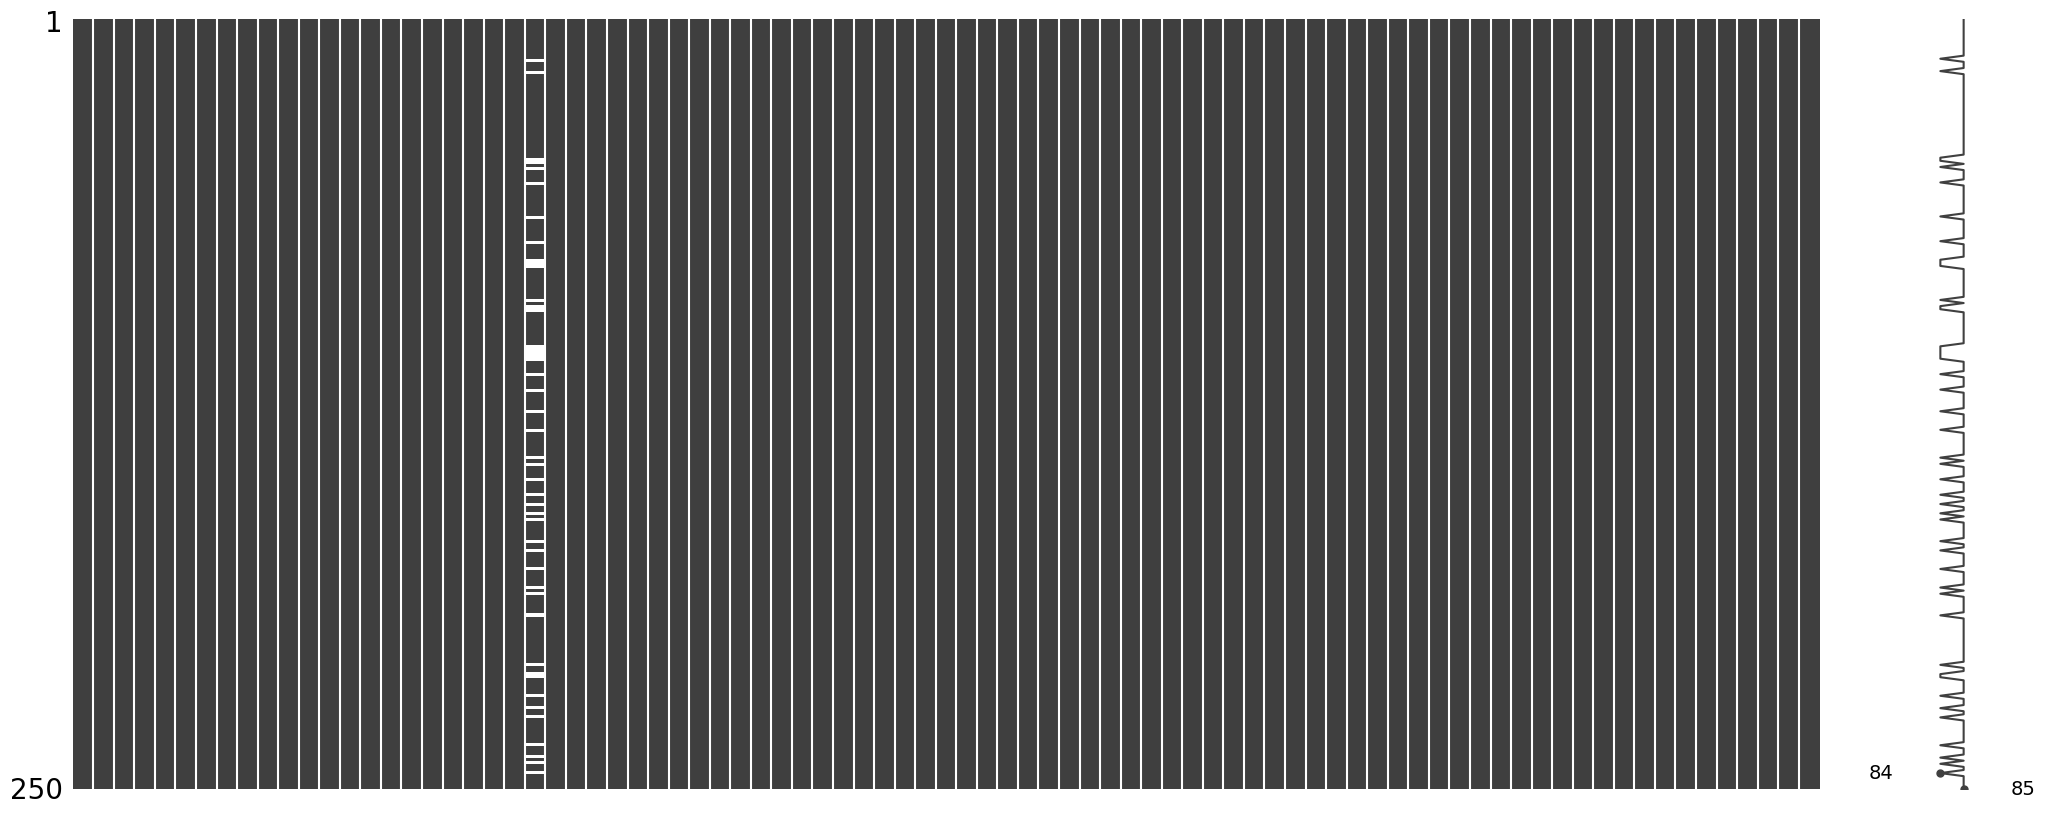

In [126]:
msno.matrix(extract_data.sample(250))

In [127]:
extract_data.columns

Index(['Actual_Donation_Amount', 'NPO_Tax_Deductibility', 'Distinct_Donors',
       'Campaign_Goal', 'Campaign_Start_Date', 'Campaign_End_Date',
       'Campaign_Image1', 'Campaign_Image2', 'Campaign_Image3',
       'Campaign_Image4', 'Campaign_Image5', 'Campaign_Video',
       'Impact_Message1', 'Impact_Message2', 'Impact_Message3',
       'Impact_Message4', 'Impact_Message5', 'Custom_Amount1',
       'Custom_Amount2', 'Custom_Amount3', 'Custom_Amount4',
       'Description_Campaign', 'Description_NPO', 'Org_Cause_Animal_Welfare',
       'Org_Cause_Arts_Heritage', 'Org_Cause_Children_Youth',
       'Org_Cause_Community', 'Org_Cause_Disability', 'Org_Cause_Education',
       'Org_Cause_Elderly', 'Org_Cause_Environment', 'Org_Cause_Families',
       'Org_Cause_Health', 'Org_Cause_Humanitarian',
       'Org_Cause_Social Service', 'Org_Cause_Sports', 'Org_Cause_Women_Girls',
       'Cam_Cause_Animal_Welfare', 'Cam_Cause_Arts_Heritage',
       'Cam_Cause_Children_Youth', 'Cam_Cause_Communi

<font face = "Time New Roman" size = 5>  Convert to numeric type</font>

In [128]:
extract_data['Total_Msg_subjectivity'] = pd.to_numeric( extract_data['Total_Msg_subjectivity'])
extract_data['Total_Msg_polarity'] = pd.to_numeric( extract_data['Total_Msg_polarity'])
extract_data['NPO_Tax_Deductibility'] = pd.to_numeric(extract_data['NPO_Tax_Deductibility'])
extract_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15979 entries, 0 to 15978
Data columns (total 85 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Actual_Donation_Amount    15979 non-null  float64
 1   NPO_Tax_Deductibility     15979 non-null  int64  
 2   Distinct_Donors           15979 non-null  int64  
 3   Campaign_Goal             15979 non-null  int64  
 4   Campaign_Start_Date       15979 non-null  object 
 5   Campaign_End_Date         15979 non-null  object 
 6   Campaign_Image1           15979 non-null  int64  
 7   Campaign_Image2           15979 non-null  int64  
 8   Campaign_Image3           15979 non-null  int64  
 9   Campaign_Image4           15979 non-null  int64  
 10  Campaign_Image5           15979 non-null  int64  
 11  Campaign_Video            15979 non-null  int64  
 12  Impact_Message1           15979 non-null  object 
 13  Impact_Message2           15979 non-null  object 
 14  Impact

In [129]:
extract_data[20:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15959 entries, 20 to 15978
Data columns (total 85 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Actual_Donation_Amount    15959 non-null  float64
 1   NPO_Tax_Deductibility     15959 non-null  int64  
 2   Distinct_Donors           15959 non-null  int64  
 3   Campaign_Goal             15959 non-null  int64  
 4   Campaign_Start_Date       15959 non-null  object 
 5   Campaign_End_Date         15959 non-null  object 
 6   Campaign_Image1           15959 non-null  int64  
 7   Campaign_Image2           15959 non-null  int64  
 8   Campaign_Image3           15959 non-null  int64  
 9   Campaign_Image4           15959 non-null  int64  
 10  Campaign_Image5           15959 non-null  int64  
 11  Campaign_Video            15959 non-null  int64  
 12  Impact_Message1           15959 non-null  object 
 13  Impact_Message2           15959 non-null  object 
 14  Impac

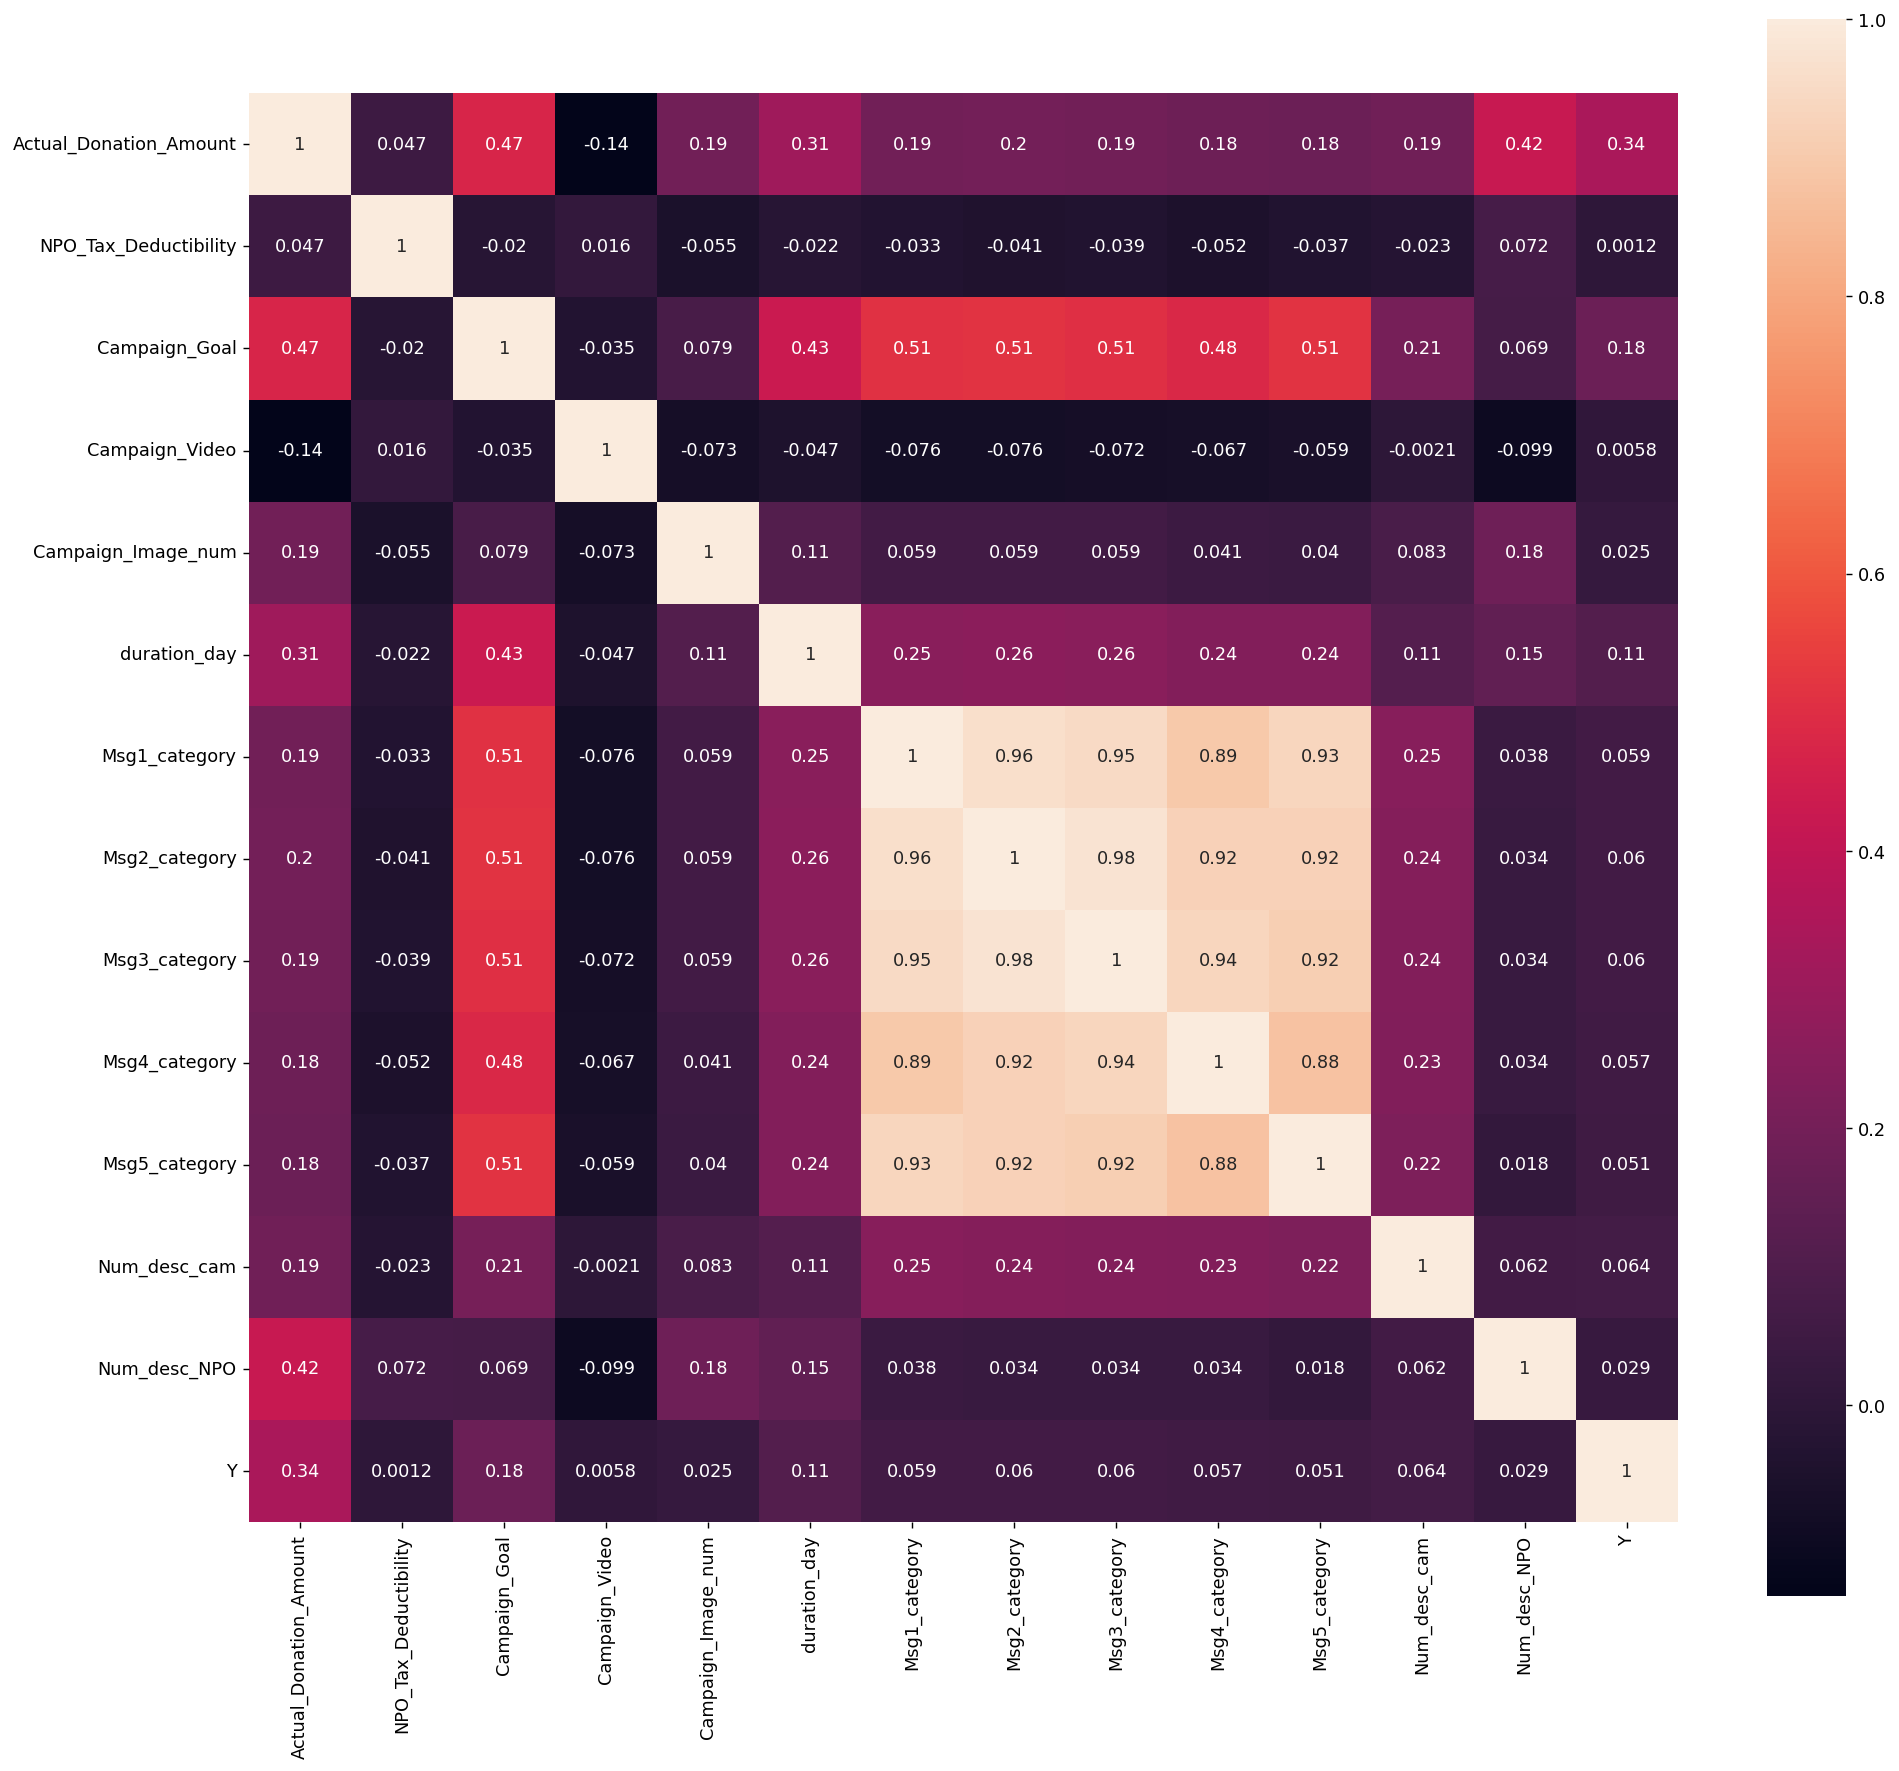

In [152]:
#numeric_features Store the following variables that need to draw correlations
numeric_feature = ['Actual_Donation_Amount', 'NPO_Tax_Deductibility', 'Campaign_Goal', 'Campaign_Video','Campaign_Image_num', 'duration_day', 
                    'Msg1_category', 'Msg2_category', 'Msg3_category', 'Msg4_category',
                    'Msg5_category', 'Num_desc_cam', 'Num_desc_NPO' ]
numeric_features1 = [ 'Campaign_Goal', 'NPO_Tax_Deductibility', 
       'Campaign_Video', 'Total_Msg_polarity', 'Total_Msg_subjectivity',
       'Custom_Amount1', 'Custom_Amount2', 'Custom_Amount3', 'Custom_Amount4',
       'Campaign_Image_num', 'duration_day', 'Msg1_subjectivity', 
       'Msg2_subjectivity', 'Msg3_subjectivity', 'Msg4_subjectivity',
       'Msg5_subjectivity', 'Total_similarity', 'Total_distance',
       'Msg1_category', 'Msg2_category', 'Msg3_category', 'Msg4_category',
       'Msg5_category','Org_causes', 'Cam_causes']

numeric_features2 = ['Actual_Donation_Amount', 'Campaign_Goal', 'duration_day','Campaign_Image_num', 
       'Campaign_Video', 
       'Msg1_category', 'Msg2_category', 'Msg3_category', 'Msg4_category',
       'Msg5_category','Total_Msg_polarity', 'Total_Msg_subjectivity','Total_similarity', 'Total_distance','NPO_Tax_Deductibility', 'Org_causes', 'Cam_causes']

#Correlation analysis
price_numeric = extract_data[numeric_feature]
correlation = price_numeric.corr()
y_train = Orginal_data['Actual_Donation_Amount']
corr = plt.subplots(figsize = (18,16), dpi=128)
corr= sns.heatmap(price_numeric.assign(Y=y_train).corr(method='spearman'), annot=True,square=True)

<font face = "Time New Roman" size = 6> Modeling verfication</font>

## Model1 <font color = red> 'Org_causes'  'Cam_causes' are ignored?</font>

In [154]:
variable_list1 = ['Actual_Donation_Amount', 'Campaign_Goal','duration_day' ,'Campaign_Video',
                'Campaign_Image_num', 'Num_desc_cam', 'Num_desc_NPO' ]
variables_data1 = extract_data[variable_list1]

## Model2

In [147]:
variable_list2 = ['Actual_Donation_Amount', 'NPO_Tax_Deductibility', 'Campaign_Goal', 'Campaign_Video','Campaign_Image_num', 'duration_day', 
                    'Msg1_category', 'Msg2_category', 'Msg3_category', 'Msg4_category',
                    'Msg5_category', 'Num_desc_cam', 'Num_desc_NPO' ]
variables_data2 = extract_data[variable_list2]

## Model3

In [148]:
variable_list3 = ['Actual_Donation_Amount',  'Campaign_Goal', 'NPO_Tax_Deductibility', 'duration_day', 'Campaign_Image_num', 
                    'Campaign_Video', 'Msg1_category', 'Msg2_category', 'Msg3_category', 'Msg4_category',
                    'Msg5_category', 'Num_desc_cam', 'Num_desc_NPO', 'Org_causes', 'Cam_causes']
variables_data3 = extract_data[variable_list3]

 <font face = "Time New Roman" size = 5> Variance, Average, Max, Min, Median calculation</font>

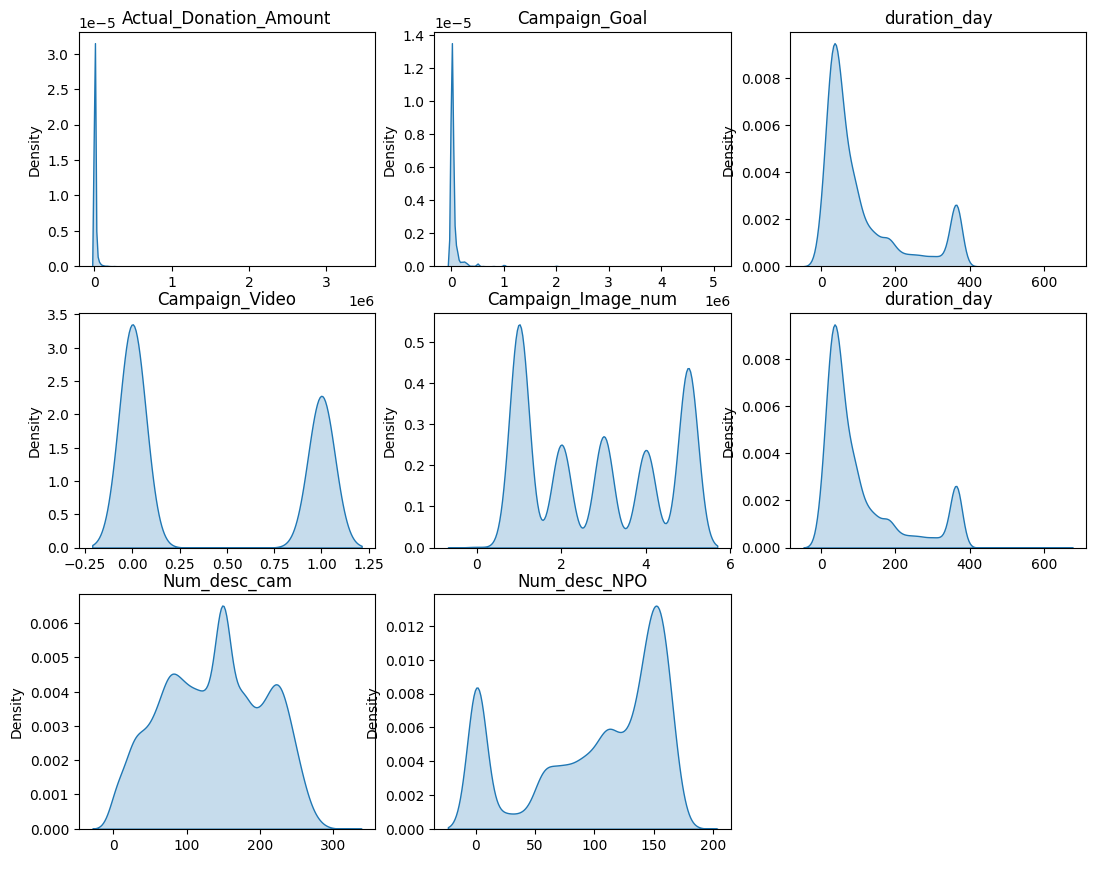

In [134]:


i = 0
plt.figure(figsize=(13, 14))
plt.xticks([])
for title in variable_list1:
    plt.subplot(4,3,i+1)
    plt.title(title)
    sns.kdeplot(extract_data[title], shade=True) 
    plt.xlabel(" ") 
    i += 1


#plt.hist(extract_data['Campaign_Goal'], bins=80, histtype="stepfilled", alpha=.8)

In [153]:

for title in variable_list2:
    
    extract_data[title] = pd.to_numeric( extract_data[title])
    print( title, "Average:",np.average(extract_data[title]))
    print( title, "Variance:" ,np.var(extract_data[title]))
    print( title, "Min:" ,np.min(extract_data[title]))
    print( title, "Max:" ,np.max(extract_data[title]))
    print( title, "Median:",np.median(extract_data[title]))
    
    


Actual_Donation_Amount Variance: 3966231020.7807913
Actual_Donation_Amount Max: 3431670.0
Actual_Donation_Amount Min: 0.0
Actual_Donation_Amount Median: 1300.0
Actual_Donation_Amount Average: 9813.046623693597
NPO_Tax_Deductibility Variance: 0.0576239683380983
NPO_Tax_Deductibility Max: 1
NPO_Tax_Deductibility Min: 0
NPO_Tax_Deductibility Median: 1.0
NPO_Tax_Deductibility Average: 0.9386069215845798
Campaign_Goal Variance: 23844896574.26401
Campaign_Goal Max: 5000000
Campaign_Goal Min: 100
Campaign_Goal Median: 5000.0
Campaign_Goal Average: 44797.3589085675
Campaign_Video Variance: 0.2408976052926278
Campaign_Video Max: 1
Campaign_Video Min: 0
Campaign_Video Median: 0.0
Campaign_Video Average: 0.40459352900682144
Campaign_Image_num Variance: 2.5242411674773044
Campaign_Image_num Max: 5
Campaign_Image_num Min: 0
Campaign_Image_num Median: 3.0
Campaign_Image_num Average: 2.8678265223105326
duration_day Variance: 12084.032362458203
duration_day Max: 630
duration_day Min: 0
duration_day Me

In [136]:
variable_list4 = ['Actual_Donation_Amount','Donation_per_donor','Campaign_Goal', 'NPO_Tax_Deductibility', 
       'Campaign_Video', 'Total_Msg_polarity', 'Total_Msg_subjectivity',
       'Custom_Amount1', 'Custom_Amount2', 'Custom_Amount3', 'Custom_Amount4',
       'Campaign_Image_num', 'duration_day', 'Msg1_subjectivity', 
       'Msg2_subjectivity', 'Msg3_subjectivity', 'Msg4_subjectivity',
       'Msg5_subjectivity', 'Total_similarity', 'Total_distance',
       'Msg1_category', 'Msg2_category', 'Msg3_category', 'Msg4_category',
       'Msg5_category', 'Num_desc_cam', 'Num_desc_NPO', 'Org_causes', 'Cam_causes']
variables_data4 = extract_data[variable_list4]

<font face = "Time New Roman" size = 5> The Linear regression of selected variables</font> <font face = "Time New Roman" size = 5 color =red> Model 1</font>

In [155]:
import statsmodels.formula.api as smf

model = smf.ols(formula = 'Actual_Donation_Amount ~ Campaign_Goal  + duration_day + \
    Campaign_Image_num  + Campaign_Video + Num_desc_cam + Num_desc_NPO', data = variables_data1).fit()

results1 = model.summary()
predicts = model._results
print(results1)


                              OLS Regression Results                              
Dep. Variable:     Actual_Donation_Amount   R-squared:                       0.304
Model:                                OLS   Adj. R-squared:                  0.304
Method:                     Least Squares   F-statistic:                     1165.
Date:                    Tue, 15 Nov 2022   Prob (F-statistic):               0.00
Time:                            14:22:37   Log-Likelihood:            -1.9635e+05
No. Observations:                   15979   AIC:                         3.927e+05
Df Residuals:                       15972   BIC:                         3.928e+05
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

<font face = "Time New Roman" size = 5 color = red> Randomly choose 50 points of prediction and actual data to compare</font>

<font face = "Time New Roman" size = 5 color = red> Circle is actual donation star is regression result</font>

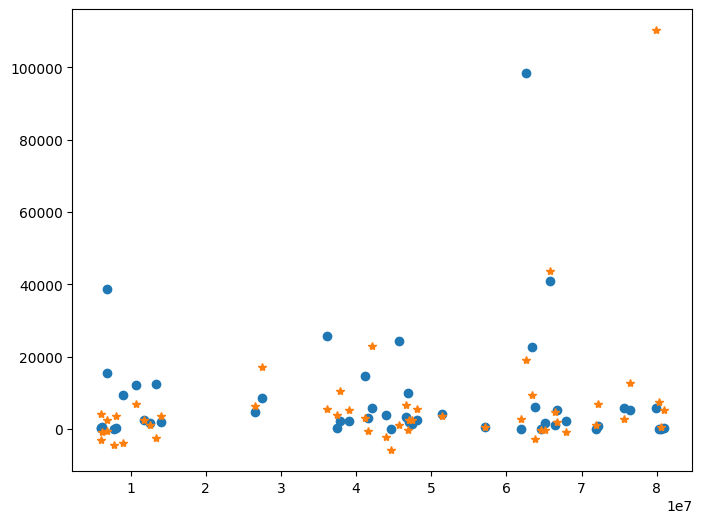

In [143]:
from random import sample
mysample = sample(range(0,Total_Rows), 50)
x = combined_data['Campaign_ID'][mysample]
y = extract_data['Actual_Donation_Amount'][mysample]
y_fitted = model.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted[mysample],'*',label='OLS')

<font face = "Time New Roman" size = 5 color = red>Test normality.</font>

In [144]:
import openturns as ot
from statsmodels.stats.diagnostic import lilliefors
model_resid = model.resid
result = lilliefors(list(model_resid))
print(result)

(0.3237611422221752, 0.0009999999999998899)


In [145]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
result = anderson(list(model_resid), dist='norm')
print('stat=%.3f' % (result.statistic))
print('significance_level:', (result.significance_level))

stat=3489.734
significance_level: [15.  10.   5.   2.5  1. ]


((array([-3.92492883, -3.70596896, -3.58603376, ...,  3.58603376,
          3.70596896,  3.92492883]),
  array([-452382.65075766, -450608.46965487, -450211.41856847, ...,
         2107564.18449976, 2300161.2985986 , 2604998.28188512])),
 (25739.23427099197, -7.798737455211335e-10, 0.4899510880870473))

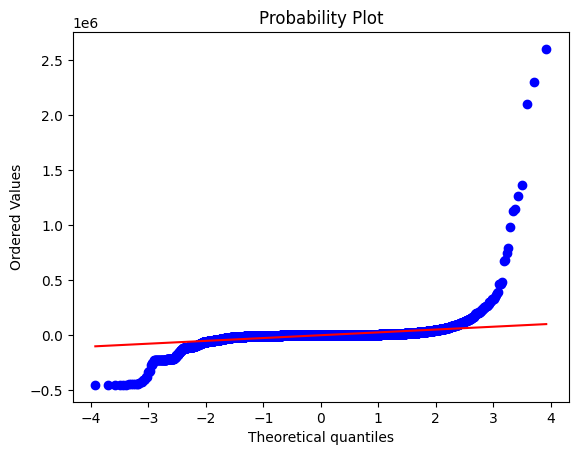

In [ ]:
#stats.probplot(sample, dist=stats.norm, plot=plt)
res = stats.probplot(list(model_resid),  dist=stats.norm, plot=plt)

<font face = "Time New Roman" size = 5 color =red> Model 2</font>

In [149]:
import statsmodels.formula.api as smf

model2 = smf.ols(formula = 'Actual_Donation_Amount ~ Campaign_Goal  + NPO_Tax_Deductibility + duration_day + \
    Campaign_Image_num  + Campaign_Video +\
    Msg1_category + Msg2_category + Msg3_category +Msg4_category + Msg5_category +\
     Num_desc_cam + Num_desc_NPO', data = variables_data2).fit()

results2 = model2.summary()
print(results2)


                              OLS Regression Results                              
Dep. Variable:     Actual_Donation_Amount   R-squared:                       0.306
Model:                                OLS   Adj. R-squared:                  0.305
Method:                     Least Squares   F-statistic:                     586.4
Date:                    Tue, 15 Nov 2022   Prob (F-statistic):               0.00
Time:                            13:57:05   Log-Likelihood:            -1.9633e+05
No. Observations:                   15979   AIC:                         3.927e+05
Df Residuals:                       15966   BIC:                         3.928e+05
Df Model:                              12                                         
Covariance Type:                nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [ ]:
model_resid2 = model2.resid
result = lilliefors(list(model_resid2))
print(result)

(0.3288416968646011, 0.0009999999999998899)


In [ ]:
variables_data3

,Actual_Donation_Amount,Campaign_Goal,NPO_Status,duration_day,Campaign_Image_num,Campaign_Video,Msg1_category,Msg2_category,Msg3_category,Msg4_category,Msg5_category,Num_desc_cam,Num_desc_NPO,Org_causes,Cam_causes
0,5561.0,50000,1.0,252,5,1,3,3,2,2,1,161,163,4,2
1,2810.0,20000,1.0,89,2,1,2,2,2,2,1,209,164,4,1
2,1118.0,30000,1.0,58,2,1,2,2,2,2,1,155,164,4,1
3,2800.0,2000,1.0,88,5,0,0,0,0,0,0,160,92,4,4
4,2030.0,5000,0.0,50,3,0,0,0,0,0,0,65,164,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15974,10.0,5000,1.0,62,4,0,0,0,0,0,0,82,162,4,4
15975,150.0,10000,1.0,30,3,0,0,0,0,0,0,147,45,1,1
15976,1000.0,1000,1.0,30,3,0,0,0,0,0,0,147,45,1,1
15977,120.0,3000,1.0,61,2,1,0,0,0,0,0,30,40,3,3


<font face = "Time New Roman" size = 5 color =red> Model 3</font>

In [150]:
model3 = smf.ols(formula = 'Actual_Donation_Amount ~ Campaign_Goal  + NPO_Tax_Deductibility + duration_day + \
    Campaign_Image_num  + Campaign_Video +\
    Msg1_category + Msg2_category + Msg3_category +Msg4_category + Msg5_category +\
    Num_desc_cam + Num_desc_NPO+ Org_causes + Cam_causes', data = variables_data3).fit()

results3 = model3.summary()
print(results3)

                              OLS Regression Results                              
Dep. Variable:     Actual_Donation_Amount   R-squared:                       0.307
Model:                                OLS   Adj. R-squared:                  0.307
Method:                     Least Squares   F-statistic:                     506.2
Date:                    Tue, 15 Nov 2022   Prob (F-statistic):               0.00
Time:                            13:57:09   Log-Likelihood:            -1.9631e+05
No. Observations:                   15979   AIC:                         3.927e+05
Df Residuals:                       15964   BIC:                         3.928e+05
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [ ]:
model.resid

0       -7370.000019
1        3405.415122
2       -5538.064057
3        2191.834759
4        8623.184623
            ...     
15974    2642.841336
15975     388.687552
15976    3265.211928
15977   -4896.802085
15978   -2027.614579
Length: 15979, dtype: float64

<font face = "Time New Roman" size = 5> The Linear regression with more variables</font>

In [151]:
model4 = smf.ols(formula = 'Actual_Donation_Amount ~ Campaign_Goal + NPO_Tax_Deductibility+Campaign_Video+Total_Msg_polarity+Total_Msg_subjectivity+Custom_Amount1+Custom_Amount2+Custom_Amount3+Custom_Amount4\
       +Campaign_Image_num+duration_day+Msg1_subjectivity\
       +Msg2_subjectivity+Msg3_subjectivity+Msg4_subjectivity\
       +Msg5_subjectivity+Total_similarity+Total_distance\
       +Msg1_category+ Msg2_category + Msg3_category + Msg4_category +Msg5_category \
       + Num_desc_cam + Num_desc_NPO+ Org_causes + Cam_causes', data = variables_data4).fit()
results4 = model4.summary()
print(results4)

                              OLS Regression Results                              
Dep. Variable:     Actual_Donation_Amount   R-squared:                       0.316
Model:                                OLS   Adj. R-squared:                  0.315
Method:                     Least Squares   F-statistic:                     284.0
Date:                    Tue, 15 Nov 2022   Prob (F-statistic):               0.00
Time:                            13:57:17   Log-Likelihood:            -1.9621e+05
No. Observations:                   15979   AIC:                         3.925e+05
Df Residuals:                       15952   BIC:                         3.927e+05
Df Model:                              26                                         
Covariance Type:                nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

<font face = "Time New Roman" size = 5> Donation per donor Linear regression result by using selected variables</font>

In [ ]:
model = smf.ols(formula = 'Donation_per_donor ~ Campaign_Goal + NPO_Tax_Deductibility+Campaign_Video+Total_Msg_polarity+Total_Msg_subjectivity+Custom_Amount1+Custom_Amount2+Custom_Amount3+Custom_Amount4\
       +Campaign_Image_num+duration_day+Msg1_subjectivity\
       +Msg2_subjectivity+Msg3_subjectivity+Msg4_subjectivity\
       +Msg5_subjectivity+Total_similarity+Total_distance\
       +Msg1_category+ Msg2_category + Msg3_category + Msg4_category +Msg5_category', data = variables_data2).fit()
results2 = model.summary()
print(results2)

PatsyError: Error evaluating factor: NameError: name 'Total_distance' is not defined
    Donation_per_donor ~ Campaign_Goal + NPO_Status+Campaign_Video+Total_Msg_polarity+Total_Msg_subjectivity+Custom_Amount1+Custom_Amount2+Custom_Amount3+Custom_Amount4       +Campaign_Image_num+duration_day+Msg1_subjectivity       +Msg2_subjectivity+Msg3_subjectivity+Msg4_subjectivity       +Msg5_subjectivity+Total_similarity+Total_distance       +Msg1_category+ Msg2_category + Msg3_category + Msg4_category +Msg5_category
                                                                                                                                                                                                                                                                                                                                         ^^^^^^^^^^^^^^

test

In [ ]:
import nltk
# nltk.download('punkt')
from textblob import TextBlob
texts=["Thank you",'OK!']
for text in texts: 
    blob=TextBlob(text)
    emotion=blob.sentiment
    print(emotion)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.625, subjectivity=0.5)
